In [184]:
import requests
import joblib
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas import option_context
from tqdm import tqdm
from statsmodels.stats.inter_rater import aggregate_raters
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

import cliffsDelta as cd
import GenerateActivities as gat
import important_features as imf

In [185]:
QUERY_ROOT = "https://api.github.com"

with open('token.txt', 'r') as file:
    TOKEN = file.read().strip()

HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify all GitHub bot actors in the list of contributors, by querying the GitHub REST API users endpoint and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is a bot actor, if it is "User", then it is an account.

In [186]:
# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter_type" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW

df = pd.read_csv('Contributors/sample14.csv')

assert len(df.columns) == 2
assert df.columns[0] == 'contributor'
assert df.columns[1] == 'bothunter_type'

print(df.head(10))


            contributor bothunter_type
0               Bisaloo          Human
1             GPUtester          Human
2               HaoZeke          Human
3           JuliaTagBot            Bot
4           Mennayousef          Human
5          Shaikh-Ubaid          Human
6              YingboMa          Human
7  allcontributors[bot]            Bot
8     andreea-alexandru          Human
9               b-pardi          Human


In [187]:
# 1. Store the names of the contributors in a list
# 2. print the list

# YOUR CODE BELOW

contributors = list(df['contributor'])
print(contributors)

['Bisaloo', 'GPUtester', 'HaoZeke', 'JuliaTagBot', 'Mennayousef', 'Shaikh-Ubaid', 'YingboMa', 'allcontributors[bot]', 'andreea-alexandru', 'b-pardi', 'bioc-workshop-dev', 'britta-wstnr', 'codecov-commenter', 'conda-bot', 'ctkelley', 'dask-bot', 'dsuponitskiy', 'fredrikekre', 'github-actions[bot]', 'github-advanced-security[bot]', 'gxydevbot', 'hexylena', 'jasongrout', 'jorgensd', 'keflavich', 'logological', 'lumberbot-app[bot]', 'martinkim0', 'mergify[bot]', 'mkitti', 'neutrinoceros', 'pachadotdev', 'quant12345', 'samwaseda', 'stats-tgeorge', 'topolarity', 'transifex-integration[bot]', 'welcome[bot]', 'xianggebenben', 'zeptodoctor']


In [188]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    and 'contributor' is each individual contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over each JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is a bot actor, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW

app_dict = []

for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    app_dict.append({ 'contributor' : contributor, 'app': json_response['type'] == 'Bot' })

app_df = pd.DataFrame.from_dict(app_dict)
print(app_df)
    

                      contributor    app
0                         Bisaloo  False
1                       GPUtester  False
2                         HaoZeke  False
3                     JuliaTagBot  False
4                     Mennayousef  False
5                    Shaikh-Ubaid  False
6                        YingboMa  False
7            allcontributors[bot]   True
8               andreea-alexandru  False
9                         b-pardi  False
10              bioc-workshop-dev  False
11                   britta-wstnr  False
12              codecov-commenter  False
13                      conda-bot  False
14                       ctkelley  False
15                       dask-bot  False
16                   dsuponitskiy  False
17                    fredrikekre  False
18            github-actions[bot]   True
19  github-advanced-security[bot]   True
20                      gxydevbot  False
21                       hexylena  False
22                     jasongrout  False
23              

### Question 2

#### Add a new 'actor' column in the CSV file to store this information. You can write True if it is a bot actor and False if it is not.

#### Report on the total number of GitHub bot actors, and User accounts present in the list of accounts of your dataset.

In [189]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter_type and user_type.

# YOUR CODE BELOW

merged_df = pd.merge(df, app_df, on='contributor')
merged_df = merged_df.rename(columns={'app': 'user_type'})


# Print the contributors that are bot actors.
bot_actors_df = merged_df[merged_df['user_type'] == True]
print(bot_actors_df['contributor'])

print(f"Total number of Users: {len(merged_df)}")
print(f"Total number of bots actors: {len(bot_actors_df)}")

7              allcontributors[bot]
18              github-actions[bot]
19    github-advanced-security[bot]
26               lumberbot-app[bot]
28                     mergify[bot]
36       transifex-integration[bot]
37                     welcome[bot]
Name: contributor, dtype: object
Total number of Users: 40
Total number of bots actors: 7


### Question 3

#### For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online.


In [190]:
# 1. allcontributors[bot]
#    Purpose: Automates acknowledging contributors in open source projects.

# 2. github-actions[bot]
#    Purpose: Executes automated workflows in GitHub repositories.

# 3. github-advanced-security[bot]
#    Purpose: Enhances repository security by identifying vulnerabilities.

# 4. lumberbot-app[bot]
#    Purpose: Automates tasks related to the Lumber project management tool.

# 5. mergify[bot]
#    Purpose: Automates the merging of pull requests based on defined rules.

# 6. transifex-integration[bot]
#    Purpose: Facilitates integration between Transifex projects and GitHub repositories.

# 7. welcome[bot]
#    Purpose: Adds automatic comments to pull requests or issues to welcome new contributor


## Section 4

### Question 1

#### Write an automated script to use BIMBAS (Bot Identification Model Based on Activity Sequences) to obtain a prediction of the GitHub contributor type (Bot or Human) for the contributors present in your dataset.

#### Folow the steps given in each cell to use BIMBAS and obtain predictions.

### Read all the events and select the events performed by the contributors present in the given set

In [191]:
# 1. Read the csv file of events (all_events.csv) provided along with this notebook
# 2. Convert created_at column to datetime format 
#    One possible way is to use lambda function: "events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))"
# 3. Get the contributors provided to you in a list or use the contributors list that you created in Section 3 Question 1. 
#    e.g., ['contributor1', 'contributor2', 'contributor3',...]
# 4. Select the events performed by these contributors alone. Do not consider all the events. You should consider only the events
#    performed by the contributors provided to you. Hint: you can use the df.query function
# 5. Display the considered events.

# YOUR CODE BELOW

df = pd.read_csv('all_events.csv')
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

filtered_events = df.query("login in @contributors")
filtered_events

,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,comment_node_id,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org
6,6,39747396929,CommitCommentEvent,github-actions[bot],QuantEcon/lecture-python-intro,2024-07-01 00:01:47,NaN,NaN,NaN,NaN,...,CC_kwDOIy5DFs4IkKwX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
15,15,39747413489,CommitCommentEvent,github-actions[bot],QuantEcon/lecture-python-intro,2024-07-01 00:03:24,NaN,NaN,NaN,NaN,...,CC_kwDOIy5DFs4IkKw0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
16,16,39747416135,PushEvent,github-actions[bot],napari/npe2api,2024-07-01 00:03:40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
21,21,39747427332,CreateEvent,github-actions[bot],SciML/PubChem.jl,2024-07-01 00:04:44,NaN,NaN,NaN,NaN,...,NaN,NaN,compathelper/new_version/2024-07-01-00-04-42-9...,branch,NaN,NaN,NaN,NaN,NaN,SciML
29,29,39747452010,IssueCommentEvent,JuliaTagBot,SciML/CommonWorldInvalidations.jl,2024-07-01 00:07:04,created,NaN,closed,NaN,...,IC_kwDOMOEgaM6DD0Tk,NaN,NaN,NaN,5.0,I_kwDOMOEgaM6N6wg8,2024-06-28T18:51:28Z,NaN,NaN,SciML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358415,358415,42415581205,PullRequestEvent,topolarity,JuliaLang/julia,2024-09-30 23:41:24,closed,55355.0,closed,PR_kwDOABkWpM53TVri,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JuliaLang
358416,358416,42415581597,IssuesEvent,topolarity,JuliaLang/julia,2024-09-30 23:41:25,closed,NaN,closed,NaN,...,NaN,NaN,NaN,NaN,55340.0,I_kwDOABkWpM6RqDdf,2024-09-30T23:41:24Z,NaN,NaN,JuliaLang
358417,358417,42415581548,IssuesEvent,topolarity,JuliaLang/julia,2024-09-30 23:41:25,closed,NaN,closed,NaN,...,NaN,NaN,NaN,NaN,55340.0,I_kwDOABkWpM6RqDdf,2024-09-30T23:41:24Z,NaN,NaN,JuliaLang
358418,358418,42415581465,PushEvent,topolarity,JuliaLang/julia,2024-09-30 23:41:25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JuliaLang


### Execute BIMBAS to obtain the predictions

In [192]:
# Do not modify this cell
# Use the following function the code below to obtain your predictions

def execute_bimbas(contributors_list, selected_events):
    '''
    args: contributors_list (list) - list of contributors in the dataset provided to you
          selected_events (DataFrame) - DataFrame of events performed by the considered contributors
    return: bimbas_prediction (DataFrame) - DataFrame of preditions along with the confidence in prediction for each contributor
    '''
    result=pd.DataFrame()
    temp_list = []
    bimbas = joblib.load('bimbas.joblib')
    date_limit = pd.to_datetime(selected_events.created_at.max()) + pd.DateOffset(-90)
    
    for contributor in tqdm(contributors_list):
        # c = contributors[contributor]
        activities = gat.activity_identification(selected_events.query('login==@contributor and created_at>=@date_limit'))
        activity_features = (
                            imf.extract_features(activities)
                            .set_index([[contributor]])
                            )
        # features = pd.concat([features,activity_features])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            probability = bimbas.predict_proba(activity_features)[0][1]
        if(probability <= 0.5):
            contributor_type = 'Human'
        else:
            contributor_type = 'Bot'
        confidence = (abs(probability - 0.5)*2).round(3)
    
        pred = activity_features.set_index([[contributor]]).assign(
            prediction=contributor_type,
            confidence = confidence,
            )
        temp_list.extend([{'contributor':contributor,'bimbas_type':contributor_type,'confidence':confidence}])
    
    bimbas_prediction = pd.DataFrame.from_dict(temp_list)

    return(bimbas_prediction)

In [193]:
# Write your code here to call execute_bimbas function. 
# Pass the contributors list and the filtered events DataFrame as argument to "execute_bimbas" function
# Prediction returned by BIMBAS will have "contributor", "bimbas_type" and "confidence"
# Note: Print the prediction provided by BIMBAS - else this cell will not be graded.

# YOUR CODE BELOW

predictions = execute_bimbas(contributors, filtered_events)
predictions

100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


,contributor,bimbas_type,confidence
0,Bisaloo,Human,0.839
1,GPUtester,Bot,0.841
2,HaoZeke,Human,0.951
3,JuliaTagBot,Bot,0.345
4,Mennayousef,Human,0.827
5,Shaikh-Ubaid,Human,0.814
6,YingboMa,Human,0.886
7,allcontributors[bot],Bot,0.567
8,andreea-alexandru,Bot,0.764
9,b-pardi,Bot,0.732


### Create a column in your predictions DataFrame to have predictions provided by BIMBAS. 
### Now your DataFrame should have the following columns - contributor, bothunter_type, app, bimbas_type, confidence 

### Merging bothunter and bimbas predictions

In [194]:
# Merge the predictions provided by BIMBAS to the resultant dataset of Section 3. This final DataFrame should have the following columns - 
# contributor, bothunter_type, user_type, bimbas_type, and confidence.

final_df = pd.merge(merged_df, predictions, on='contributor')
final_df.head(10)

,contributor,bothunter_type,user_type,bimbas_type,confidence
0,Bisaloo,Human,False,Human,0.839
1,GPUtester,Human,False,Bot,0.841
2,HaoZeke,Human,False,Human,0.951
3,JuliaTagBot,Bot,False,Bot,0.345
4,Mennayousef,Human,False,Human,0.827
5,Shaikh-Ubaid,Human,False,Human,0.814
6,YingboMa,Human,False,Human,0.886
7,allcontributors[bot],Bot,True,Bot,0.567
8,andreea-alexandru,Human,False,Bot,0.764
9,b-pardi,Human,False,Bot,0.732


### Question 2
#### Using Cohen's Kappa compute and report the interrater agreement score between the labels computed by both the bot identification approaches. Mention your interpretation of Cohen's Kappa

In [195]:
# Hint: use the cohen_kappa_score library
# YOUR CODE BELOW

kappa_score = cohen_kappa_score(final_df['bimbas_type'], final_df['bothunter_type'])
kappa_score

# Interpretation: fair agreement
# So, they agree sometimes but it is not that often.

np.float64(0.33333333333333337)

### Question 3
#### Determine the final type of each contributor. Whenever user_type column has the value "User" check if both bimbas_type and bothunter_type give the same prediction, then consider it as your final prediction in "acc_type" column.
#### For the contributors that have different predictions, i.e. bimbas_type is not same as bothunter_type, then make a manual verification and consider that as the type for that contributor. Add an extra column to the DataFrame ﬁle called 'manual' that has the label determined by you. 
#### For manual verification you can make use the GitHub UI and the GitHub API https://api.github.com/users/username

#### Whenever user_type column has the value "Bot", directly write your final acc_type as "Bot Actor"

#### More information:
For each contributor, you can look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor>/events, to make a decision on their type.

In addition, you can also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This will be useful to answer your next question.

In [196]:
# Write the code for your manual decision here
# example : 
# manual_list_dict = [{'contributor': '<contributor name>', 'manual': '<your prediction>'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW

manual_list_dict = [
    {'contributor': 'GPUtester', 'manual': 'Bot'}, # There are pull requests with automated comments.
    {'contributor': 'andreea-alexandru', 'manual': 'Human'}, # Has a Github Pages portfolio about them.
    {'contributor': 'b-pardi', 'manual': 'Human'}, # PhD Student at the university of California.
    {'contributor': 'bioc-workshop-dev', 'manual': 'Human'}, # Almost no activity on Github, no public repos, no profile picture.
    {'contributor': 'britta-wstnr', 'manual': 'Human'}, # Has a photo of them in the profile picture, they are a researcher. They also have an X (Twitter) account linked.
    {'contributor': 'conda-bot', 'manual': 'Bot'}, # "I'm a bot" in the user description. Also has a lot of activity on Github.
    {'contributor': 'ctkelley', 'manual': 'Human'}, # Regular human activities, has a profile picture, and the profile name "C. T. (Tim) Kelley" looks like human.
    {'contributor': 'gxydevbot', 'manual': 'Bot'}, # Had activities every monday for about a year, then every Sunday since then.
    {'contributor': 'logological', 'manual': 'Human'}, # They are a Computational linguist at the University of Manitoba.
    {'contributor': 'samwaseda', 'manual': 'Human'}, # Has a photo of them in the profile picture. In the activities you see a gap of 3 weeks every year, it is probably their holidays.
    {'contributor': 'stats-tgeorge', 'manual': 'Human'}, # Has a photo of them in the profile picture. They are an assistant professor in Statistics.
    {'contributor': 'xianggebenben', 'manual': 'Human'}, # Has a photo of them in the profile picture. They have a Github pages with a portfolio about them.
    {'contributor': 'zeptodoctor', 'manual': 'Human'}, # No public activities on Github.
]

In [197]:
# Write your code below here to determine the final type of contributor.
# add column named 'acc_type' and write your final decision in it. Final decision is majority of three types - bimbas_type, bothunter_type, manual.

final_df.loc[
    (final_df['user_type'] == True) | ((final_df['bimbas_type'] == 'Bot') & (final_df['bothunter_type'] == 'Bot')),
    'acc_type'
] = 'Bot'

final_df.loc[
    (final_df['bimbas_type'] == 'Human') & (final_df['bothunter_type'] == 'Human'),
    'acc_type'
] = 'Human'

manual_df = pd.DataFrame(manual_list_dict)
final_df = final_df.merge(manual_df, on='contributor', how='left')

final_df['acc_type'] = final_df['manual'].fillna(final_df['acc_type'])
final_df = final_df.drop(columns=['manual'])

final_df

,contributor,bothunter_type,user_type,bimbas_type,confidence,acc_type
0,Bisaloo,Human,False,Human,0.839,Human
1,GPUtester,Human,False,Bot,0.841,Bot
2,HaoZeke,Human,False,Human,0.951,Human
3,JuliaTagBot,Bot,False,Bot,0.345,Bot
4,Mennayousef,Human,False,Human,0.827,Human
5,Shaikh-Ubaid,Human,False,Human,0.814,Human
6,YingboMa,Human,False,Human,0.886,Human
7,allcontributors[bot],Bot,True,Bot,0.567,Bot
8,andreea-alexandru,Human,False,Bot,0.764,Human
9,b-pardi,Human,False,Bot,0.732,Human


### Question 4
#### Study and report the purpose of these identified bots and humans in the repository assigned to you.
#### For example, the purpose can be based on but not limited to - 
##### 1) the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), 
##### 2) type of comments they are posting (reviewing code, test summary report), 
##### 3) when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on.  
#### Note: 
##### The purpose can be other than what is provided in examples above.

In [198]:
# I talked to You (And you said to me that I could only write 5 activities)

# 1. 'gxydevbot' is a bot that is making pull request to update workflows and tools used in a repository, a bit like dependabot.
# 2. 'conda-bot' is a bot that creates issues when tests workflow fails to let the devs know that they have to fix that. It is also a bot to update the repository.
# 3. 'welcome[bot]' is a bot that adds automatic comments to pull requests or issues to welcome new contributor.
# 4. 'allcontributors[bot]' is a bot automate acknowledgement of contributors to your open source projects. By asking it to add a contributor, it will create a pull request to add them.
# 5. 'JuliaTagBot' is a bot that automatically creates Github tags for the Julia repositories and creates automatic pull requests.

## Section 5

### Question 1
#### Use the filtered events file that has the events performed by the contributors provided to you
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['login','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and
5. Reset index and rename axis with None
7. Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
8. The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type

The final DataFrame should be looking like the following  
![](event_group.png)

In [199]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [200]:
# YOUR CODE BELOW

group_df = filtered_events.copy()

group_df.loc[group_df['event_type'].isin(issue_group), 'event_group'] = 'issue'
group_df.loc[group_df['event_type'].isin(pr_group), 'event_group'] = 'pr'
group_df.loc[group_df['event_type'].isin(commit_group), 'event_group'] = 'commit'
group_df.loc[group_df['event_type'].isin(repo_group), 'event_group'] = 'repo'

group_df = group_df.groupby(['login', 'event_group']).agg(
    event_count=('event_type', 'count')  # Count the number of events per group
).reset_index()

group_df = group_df.pivot(index='login', columns='event_group', values='event_count')
group_df.reset_index(inplace=True)
group_df.columns.name = None

group_df = pd.merge(group_df, final_df[['contributor', 'acc_type']], left_on='login', right_on='contributor')

group_df.drop('contributor', axis=1, inplace=True)

group_df.fillna(0, inplace=True)

group_df

,login,commit,issue,pr,repo,acc_type
0,Bisaloo,2.0,9.0,2.0,1.0,Human
1,GPUtester,0.0,18.0,0.0,0.0,Bot
2,HaoZeke,1.0,90.0,13.0,4.0,Human
3,JuliaTagBot,0.0,607.0,0.0,0.0,Bot
4,Mennayousef,0.0,8.0,6.0,4.0,Human
5,Shaikh-Ubaid,3.0,24.0,24.0,3.0,Human
6,YingboMa,29.0,29.0,31.0,18.0,Human
7,allcontributors[bot],23.0,10.0,10.0,10.0,Bot
8,andreea-alexandru,26.0,0.0,0.0,1.0,Human
9,b-pardi,0.0,11.0,0.0,0.0,Human


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.

Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group. An example is given below

In [201]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [202]:
# YOUR CODE BELOW

# The bot actors and bot users have the same user_type 'Bot', so I don't need to group them.

medians = []
for type in ["Bot", "Human"]:
    for event_group in ["pr", "commit", "issue", "repo"]:
        median = group_df[group_df["acc_type"] == type][event_group].median()
        medians.append({"event_group": event_group, "median": median, "acc_type": type})

medians_df = pd.DataFrame(medians)
medians_df

,event_group,median,acc_type
0,pr,7.0,Bot
1,commit,0.0,Bot
2,issue,26.0,Bot
3,repo,0.0,Bot
4,pr,6.0,Human
5,commit,1.0,Human
6,issue,29.0,Human
7,repo,1.0,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [203]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot
1,event_group1,val2,Human
2,event_group2,val3,Bot
3,event_group2,val4,Human
4,event_group3,val5,Bot
5,event_group3,val6,Human
6,event_group4,val7,Bot
7,event_group5,val8,Human


In [204]:
# pivot the main DataFrame
df_medians.pivot(index='acc_type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
acc_type,,,,,
Bot,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [205]:
# YOUR CODE BELOW

medians_pivot_df = medians_df.pivot(index='acc_type', columns='event_group', values='median')
medians_pivot_df

event_group,commit,issue,pr,repo
acc_type,,,,
Bot,0.0,26.0,7.0,0.0
Human,1.0,29.0,6.0,1.0


<Axes: xlabel='event_group', ylabel='acc_type'>

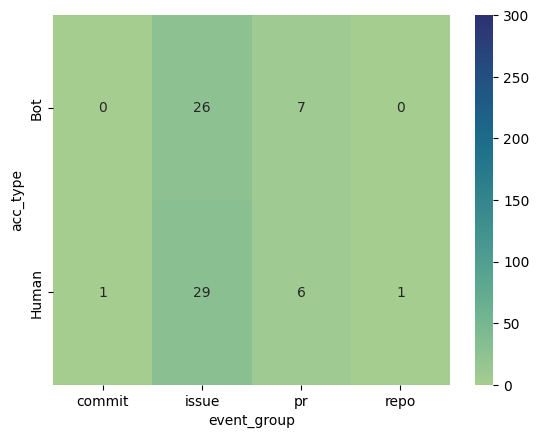

In [206]:
# YOUR CODE BELOW
sns.heatmap(medians_pivot_df, annot=True, vmin=0, vmax=300, cmap="crest")


#### What is the difference that you observe between Bots+Bot actors and Humans?

In [207]:
# Bots+Bot actors only creates issues and pr, while Humans also commits and create repositories.
# Humans have more different activities, while Bots only perform on specific activities.

#### What is the differnce that you observe between Event groups?

In [208]:
# Commits and repository events are the less frequent. However, issue events are the most common by far. 

#### What is the difference that you observe between Bots+Bot actors and Humans and Event groups all considering at the same time?

In [209]:
# For both Bots and Humans, issue events are the most frequent, followed by pull request events. 

### Question 3

#### Create boxen plots to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot 
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

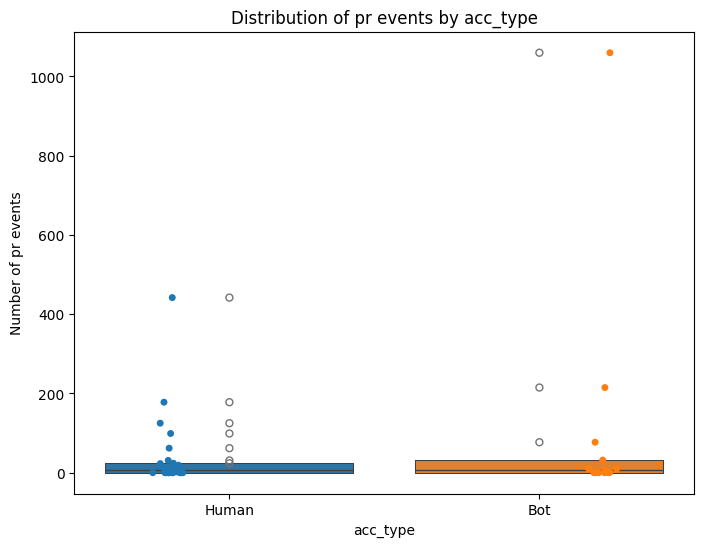

In [210]:
# YOUR CODE BELOW - Visualize number of events from pull request event group

event_group = "pr"

plt.figure(figsize=(8, 6))
sns.boxenplot(x="acc_type", y=event_group, data=group_df, hue='acc_type')
sns.stripplot(x="acc_type", y=event_group, data=group_df, hue='acc_type', dodge=True)

plt.title(f"Distribution of {event_group} events by acc_type")
plt.xlabel("acc_type")
plt.ylabel(f"Number of {event_group} events")

plt.show()

# Humans tend to do more pull requests than Bots, because very few bots (about 3) are above the 75th quartile, they do not vary much compared to Humans.


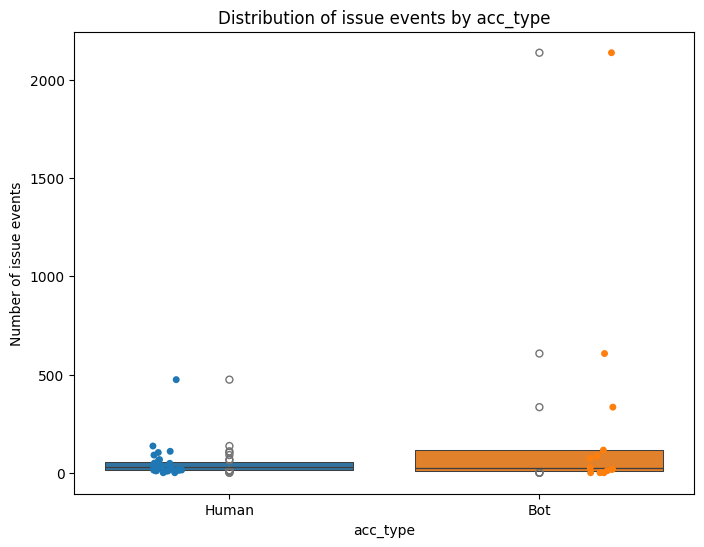

In [211]:
# YOUR CODE BELOW - Visualise number of events from issue event group

event_group = "issue"

plt.figure(figsize=(8, 6))
sns.boxenplot(x="acc_type", y=event_group, data=group_df, hue='acc_type')
sns.stripplot(x="acc_type", y=event_group, data=group_df, hue='acc_type', dodge=True)

plt.title(f"Distribution of {event_group} events by acc_type")
plt.xlabel("acc_type")
plt.ylabel(f"Number of {event_group} events")

plt.show()

# Bots tend to do more issue events than Humans, since 75th qurtile is above for the Bots. But the 25th quartile are about the same value, so that means that Bots tend to vary more than Humans.

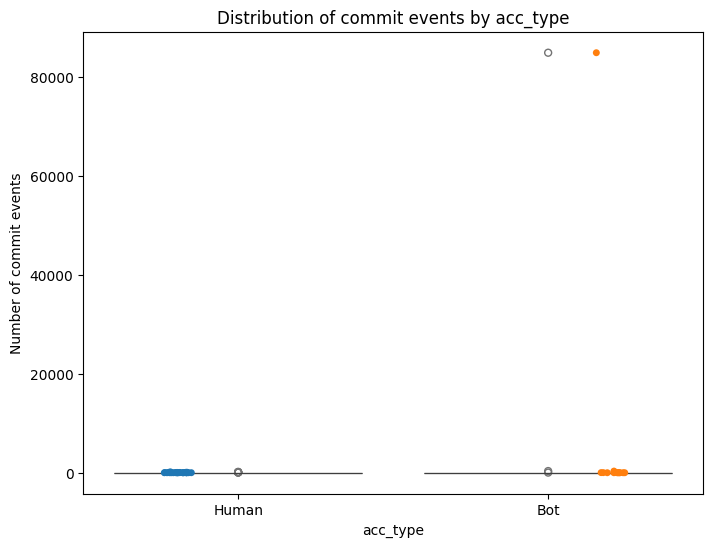

In [212]:
# YOUR CODE BELOW - Visualise number of events from commit event group

event_group = "commit"

plt.figure(figsize=(8, 6))
sns.boxenplot(x="acc_type", y=event_group, data=group_df, hue='acc_type')
sns.stripplot(x="acc_type", y=event_group, data=group_df, hue='acc_type', dodge=True)

plt.title(f"Distribution of {event_group} events by acc_type")
plt.xlabel("acc_type")
plt.ylabel(f"Number of {event_group} events")

plt.show()

# They are not really different, so there is nothing to interpret really. Only that there is one Bot that has done a lot more commits (Github Actions Bot).

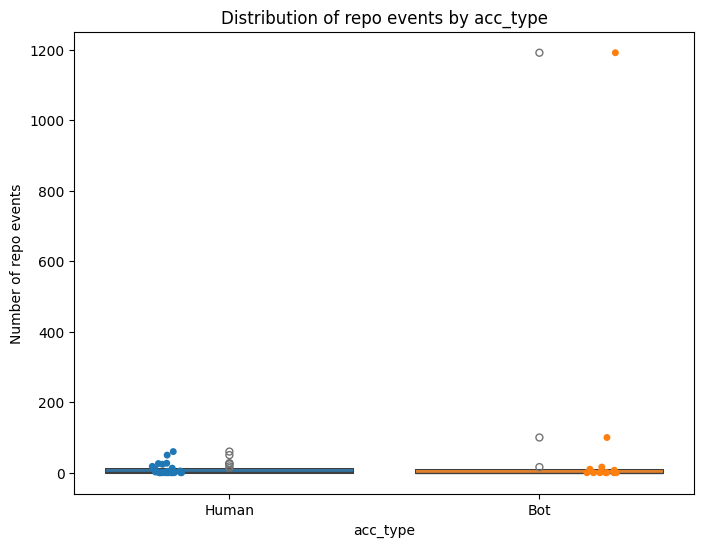

In [213]:
# YOUR CODE BELOW - Visualise number of events from repo event group

event_group = "repo"

plt.figure(figsize=(8, 6))
sns.boxenplot(x="acc_type", y=event_group, data=group_df, hue='acc_type')
sns.stripplot(x="acc_type", y=event_group, data=group_df, hue='acc_type', dodge=True)

plt.title(f"Distribution of {event_group} events by acc_type")
plt.xlabel("acc_type")
plt.ylabel(f"Number of {event_group} events")

plt.show()

# Humans tend to do more repository events than Bots, because very few bots (about 3) are above the 75th quartile, they do not vary much compared to Humans.

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [214]:
# YOUR CODE BELOW

for event in ["pr", "commit", "issue", "repo"]:
    _, p_value = shapiro(group_df[event])
    print(f"{event} events: p-value = {p_value}")


pr events: p-value = 7.396528595904048e-12
commit events: p-value = 6.904642242378007e-14
issue events: p-value = 3.522594916023496e-12
repo events: p-value = 1.8846420907707777e-13


In [215]:
# We can reject the null hypothesis H0 for all event types, since the p-value is below the threshold 0.05.
# That means that the sample comes from the data that has not a normal distribution.

### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [216]:
# YOUR CODE BELOW

# Since the shapiro test rejected the null hypothesis for all the event types, I only used the Mann-Whitney U statistical test.

event_types = ["pr", "commit", "issue", "repo"]
rejected_pairs = []

for event1 in ["pr", "commit", "issue", "repo"]:
        for event2 in ["pr", "commit", "issue", "repo"]:
                if event1 >= event2:
                        continue
                _, p_value = mannwhitneyu(group_df[event1], group_df[event2], alternative='two-sided', method='exact', nan_policy='omit')
                print(f"{event1} and {event2} events: p-value = {p_value}")
                print(f"Reject H0: {p_value < 0.01}")
                print()

                if p_value < 0.01:
                        rejected_pairs.append((event1, event2))


pr and repo events: p-value = 0.1712274475038769
Reject H0: False

commit and pr events: p-value = 0.4127289840891789
Reject H0: False

commit and issue events: p-value = 0.0006740491685976392
Reject H0: True

commit and repo events: p-value = 0.6771573878425444
Reject H0: False

issue and pr events: p-value = 0.0029489611170520043
Reject H0: True

issue and repo events: p-value = 3.342322811224629e-06
Reject H0: True



### Question 4.3
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values, list of values). This will return the effect size.
#### Refer to the table given in the TP document and mention your interpretation (negligible, small, medium, large).

In [217]:
# YOU CODE BELOW

for event1, event2 in rejected_pairs:
    effect_size = abs(cd.cliffsDelta(group_df[event1], group_df[event2]))
    print(f"{event1} and {event2} events: effect_size = {effect_size}")


commit and issue events: effect_size = 0.435
issue and pr events: effect_size = 0.383125
issue and repo events: effect_size = 0.5825


In [218]:
# For issue and pr events: Interpretation: Medium
# For commit and issue events: Interpretation: Medium
# For issue and repo events: Interpretation: Large